In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from xgboost import plot_importance,XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = load_iris()
x = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.Series(data.target,name='target')

In [4]:
feature_selector = SelectKBest(score_func=f_classif,k=3)
x_new = feature_selector.fit_transform(x,y)
selected_features = x.columns[feature_selector.get_support()]
print("Selected features: ",selected_features)

Selected features:  Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')


In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [6]:
model = XGBClassifier()
model.fit(x_train,y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [7]:
y_predict = model.predict(x_test)

In [8]:
print("Accuracy:",accuracy_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

Accuracy: <function accuracy_score at 0x000002C0B9D764D0>
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Figure size 1000x600 with 0 Axes>

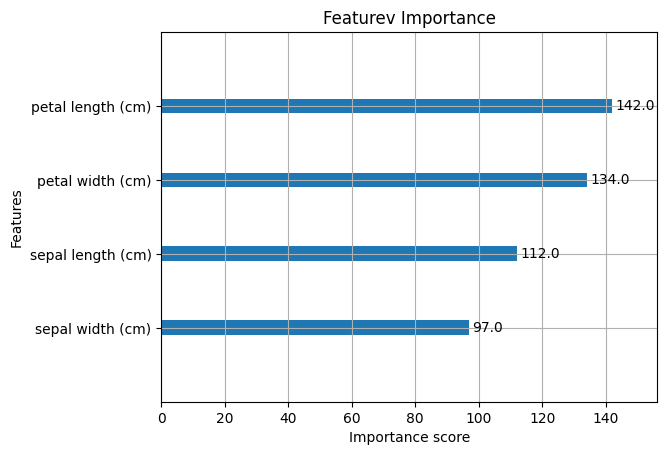

In [9]:
plt.figure(figsize=(10,6))
plot_importance(model,importance_type='weight',max_num_features=10)
plt.title('Featurev Importance')
plt.show()

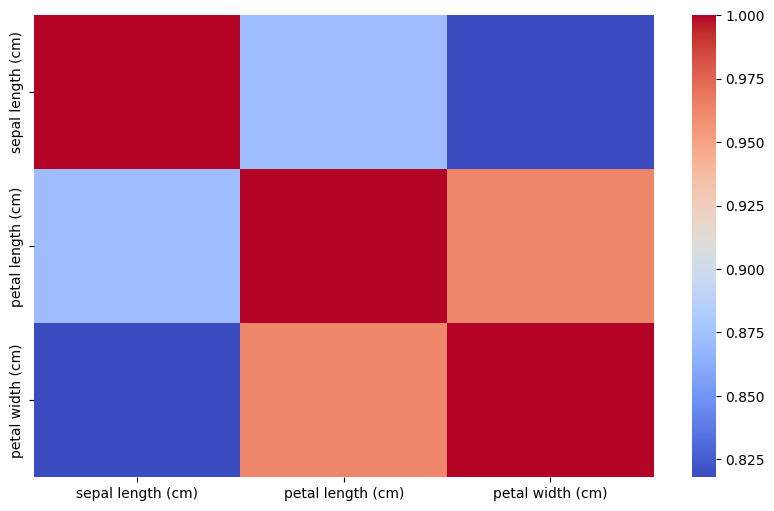

In [10]:
selected_features = pd.DataFrame(x_new,columns=selected_features)
plt.figure(figsize=(10,6))
sns.heatmap(selected_features.corr(),cmap='coolwarm')
plt.show()